# 0.0 Imports

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
from pyzipcode import ZipCodeDatabase
from geopy.geocoders import Nominatim
from sklearn.preprocessing import LabelEncoder

## 0.1 Auxiliary Functions

In [2]:
# This function will rezise all plots in this analysis

def jupyter_settings():
    %matplotlib inline
    %pylab inline
        
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 29
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## 0.2 Loading Data

In [4]:
# reading data base
base = pd.read_csv('kc_house_data.csv')

# 1.0 Data Description

In [5]:
# creating new data base from the original one to have a backup base
base1 = base

In [6]:
# seening columns name 
base1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 1.1 Data Dimension

In [7]:
# verifing data dimension
print(f'Number of rowns {base1.shape[0]}')
print(f'Number os columns {base1.shape[1]}')

Number of rowns 21613
Number os columns 21


## 1.2 Types of data

In [8]:
# verifing data types
base1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 1.3 Type Transformations

In [9]:
# changing date column into datetime format 
base1['date'] = pd.to_datetime(base['date'], infer_datetime_format='True')

In [10]:
# changing price column into int type 
base1['price'] = base1['price'].astype(int)

## 1.4 Checking NA Values 

In [11]:
# There are no NA values here
base1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# 2.0 Hypothesis Creation

**H.1.0.** Wich condition level the houses are most sold?

**H.2.0.** Houses with more bedrooms are most sold

**H.3.0.** - Houses with more bedrooms are more expensive

**H.3.1.** - Starting from how many bedrooms the house price encreased?

**H.4.0.** - Wich is the value increased for each aditional bedroom in the house?

**H.5.0.** - Wich regions the houses are more expensives?

**H.6.0.** - What are the correlations between house prices and region? 

**H.7.0** - Wich is the city with more house solds?

# 3.0 Variable Filtering

In [12]:
base3 = base1

In [13]:
# I'm assuming there are no houses with more than 10 bedrooms, so I'm making changes in every bedrooms fields  that have more than 10 bedrooms
for t in range(len(base3)):
    if base3['bedrooms'][t] == 33:
        base3['bedrooms'][t] = 3
        
    if base3['bedrooms'][t] == 11:
        base3['bedrooms'][t] = 1

<ipython-input-13-d044391ec197>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base3['bedrooms'][t] = 1
<ipython-input-13-d044391ec197>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base3['bedrooms'][t] = 3


In [14]:
# dropping duplicates values
base3 = base3.drop_duplicates()

# 4.0 Exploratory Data Analysis 

In [15]:
# making backup
base4 = base3

## 4.1 Univariate Analysis

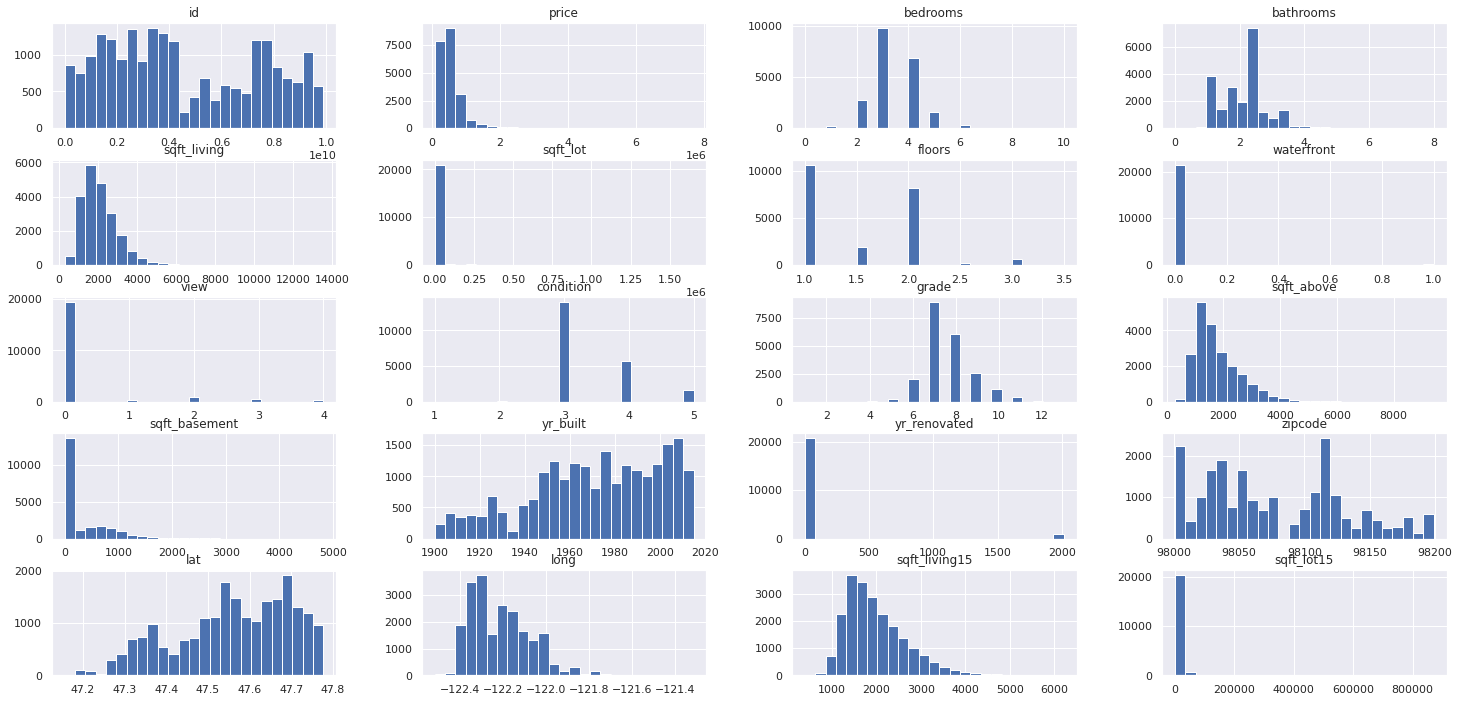

In [16]:
# plotting all variables 
base4.hist(bins=25);

## 4.1 Bivariate Analysis

### H1. Wich condition level the houses are most sold?
False: The most house condition level are the number 3 level

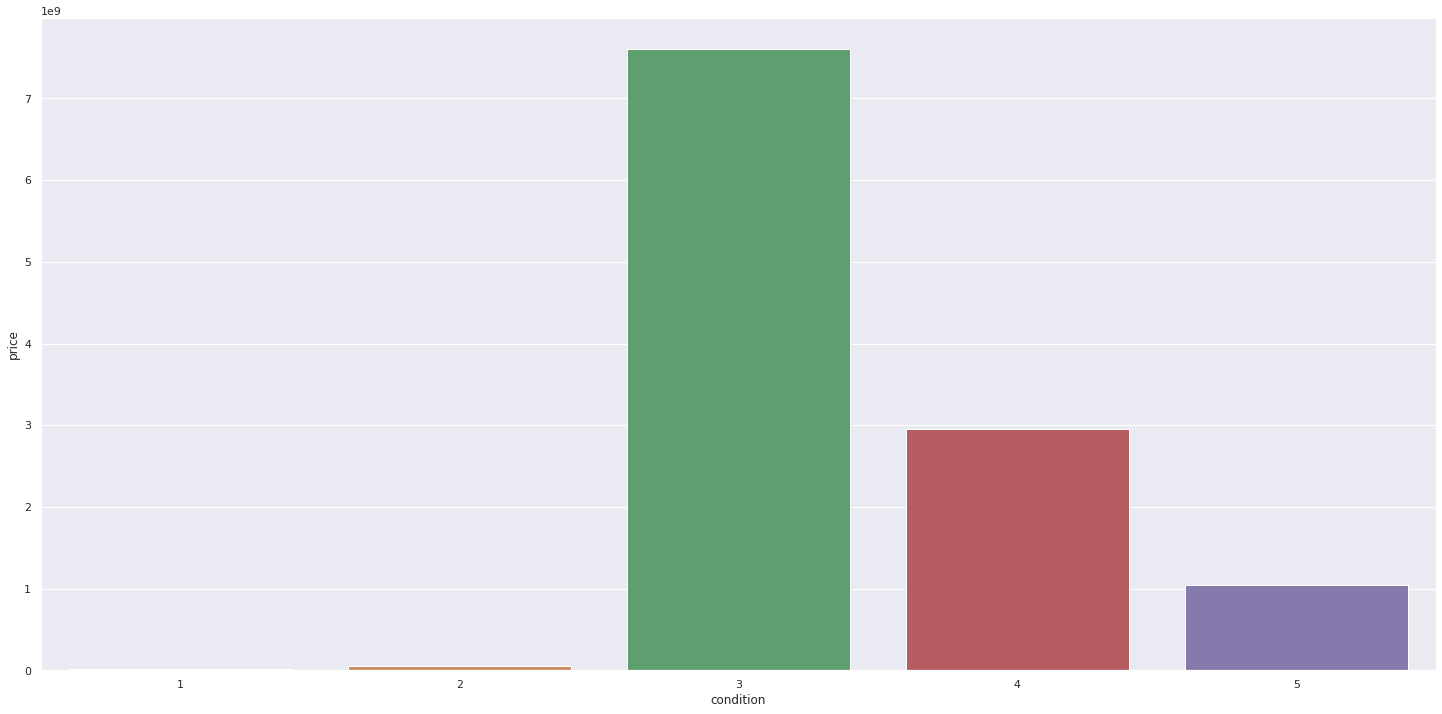

In [17]:
# plotting house prices by their conditions
aux1 = base4[['condition', 'price']].groupby('condition').sum().reset_index()
sns.barplot(x='condition', y='price', data= aux1);

### H2. Houses with more bedrooms are most sold
False: Houses with more bedrooms aren't the most solds

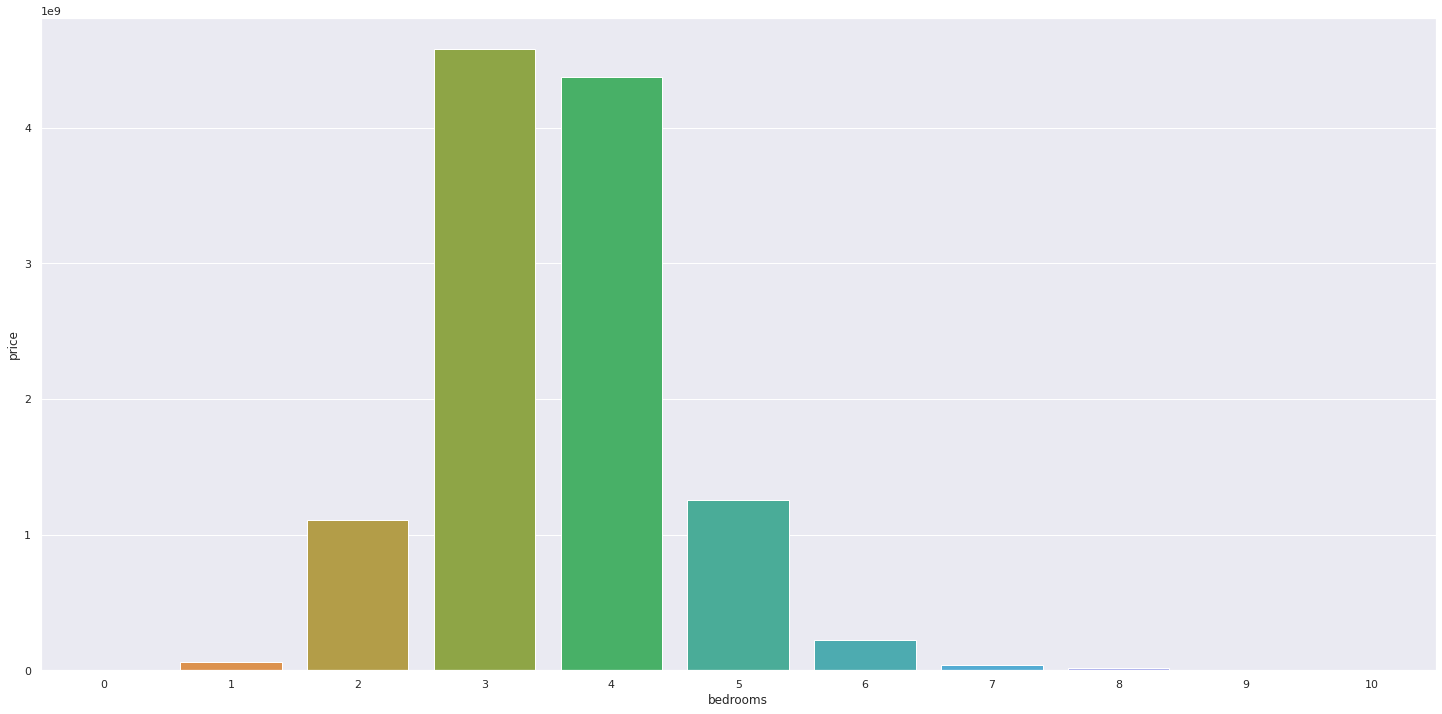

In [18]:
# plotting house prices by quantite of bedrooms inside it 
aux2 = base4[['bedrooms', 'price']].groupby('bedrooms').sum().reset_index()
sns.barplot(x='bedrooms', y='price', data= aux2);

### H3. Houses with more bedrooms are more expensive. 
False: Houses with more beddrooms are not ever the most expensives

### H3.1. Starting from how many bedrooms the house price encreased? 
Response: Starting from two bedrooms

In [19]:
# I'm getting the mean house prices per numbers of bedrooms
quarto1 = base4[base4['bedrooms'] == 1]
print('The mean value for houses with one bedroom is USD:', quarto1['price'].mean())
print()

quarto2 = base4[base4['bedrooms'] == 2]
print('The mean value for houses with two bedroom is USD:', quarto2['price'].mean())
print()

quarto3 = base4[base4['bedrooms'] == 3]
print('The mean value for houses with three bedroom is USD:', quarto3['price'].mean())
print()

quarto4 = base4[base4['bedrooms'] == 4]
print('The mean value for houses with four bedroom is USD:', quarto4['price'].mean())
print()

quarto5 = base4[base4['bedrooms'] == 5]
print('The mean value for houses with five bedroom is USD:', quarto5['price'].mean())
print()

quarto6 = base4[base4['bedrooms'] == 6]
print('The mean value for houses with six bedroom is USD:', quarto6['price'].mean())
print()

quarto7 = base4[base4['bedrooms'] == 7]
print('The mean value for houses with seven bedroom is USD:', quarto7['price'].mean())
print()

quarto8 = base4[base4['bedrooms'] == 8]
print('The mean value for houses with eight bedroom is USD:', quarto8['price'].mean())
print()

quarto9 = base4[base4['bedrooms'] == 9]
print('The mean value for houses with nine bedroom is USD:', quarto9['price'].mean())
print()

quarto10 = base4[base4['bedrooms'] == 10]
print('The mean value for houses with ten bedroom is USD:', quarto10['price'].mean())
print()

bedroom = [quarto1['price'].mean(), quarto2['price'].mean(), quarto3['price'].mean(), quarto4['price'].mean(), quarto5['price'].mean(), quarto6['price'].mean(), quarto7['price'].mean(), quarto8['price'].mean(), quarto9['price'].mean(), quarto10['price'].mean()]

The mean value for houses with one bedroom is USD: 318654.67

The mean value for houses with two bedroom is USD: 401372.681884058

The mean value for houses with three bedroom is USD: 466249.764783715

The mean value for houses with four bedroom is USD: 635419.5042138913

The mean value for houses with five bedroom is USD: 786599.8288569644

The mean value for houses with six bedroom is USD: 825520.6360294118

The mean value for houses with seven bedroom is USD: 951184.6578947369

The mean value for houses with eight bedroom is USD: 1105076.923076923

The mean value for houses with nine bedroom is USD: 893999.8333333334

The mean value for houses with ten bedroom is USD: 819333.3333333334



In [20]:
# dict with all values prices by number of bedrooms
bedrooms = {'bed1': 318654, 'bed2': 401372, 'bed3': 466249, 'bed4': 635419, 'bed5': 786599, 'bed6': 825520, 'bed7': 951184, 'bed8': 1105076, 'bed9': 893999, 'bed10': 819333}

/home/andre/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


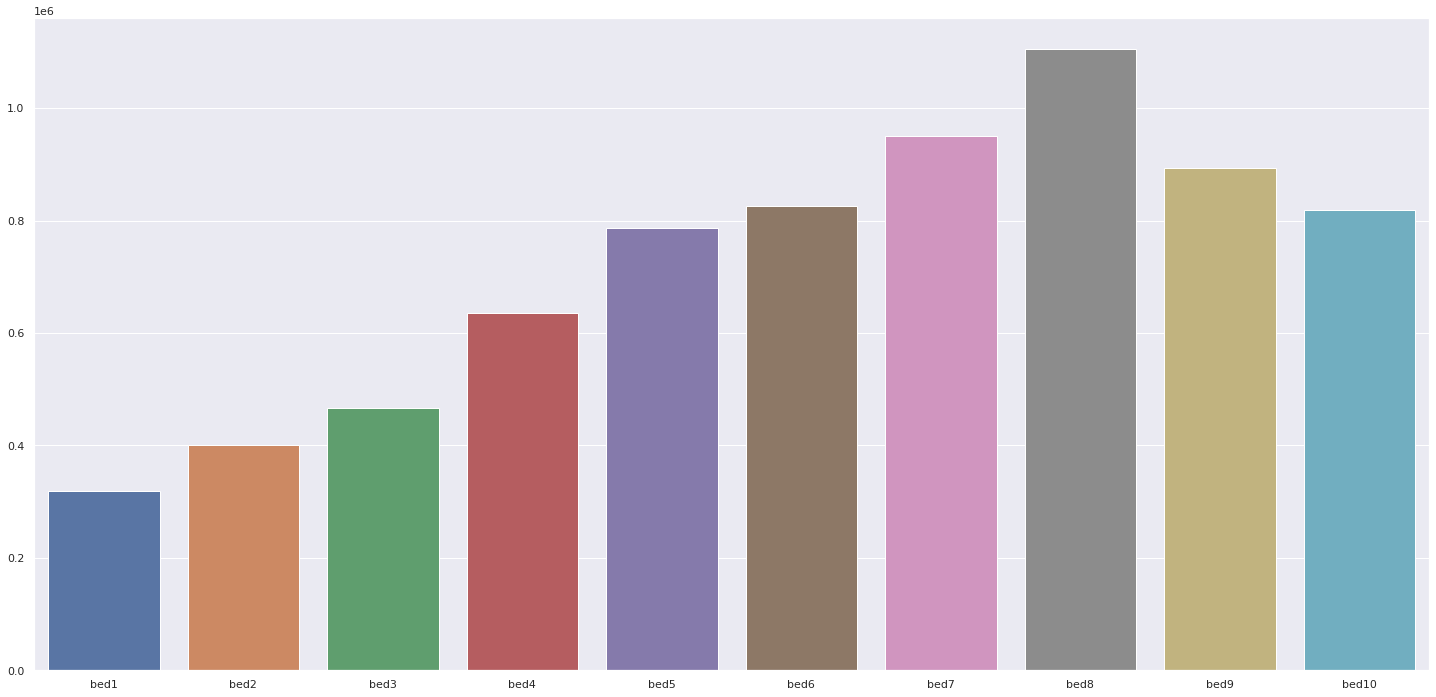

In [21]:
# plotting house prices by number of bedrooms
sns.barplot(list(bedrooms.keys()), list(bedrooms.values()));

### H4. Wich is the value increased for each aditional bedroom in the house? 
Response: The mean increase value for each aditional bedroom is USD: 107.216,58

In [22]:
# here I'm getting the mean difference between house by number of rooms
sum_list = [bedroom[8] - bedroom[9], bedroom[7] - bedroom[8], bedroom[7] - bedroom[6], bedroom[6] - bedroom[5], bedroom[5] - bedroom[4], bedroom[4] - bedroom[3], bedroom[3] - bedroom[2], bedroom[2] - bedroom[1], bedroom[1] - bedroom[0]]

final_sum = 0 

for t in sum_list:
    final_sum += t
    
final_sum = final_sum / 10

final_sum

107216.58428205126

### H5. Wich regions the houses are more expensives?
Response: Medina city and Mercer Island

In [27]:
# getting the location city of all houses in this dataset 
zip_code = ZipCodeDatabase()
cities = []

for t in range(len(base4)):
    if base4['zipcode'][t] == 98077:
        cities.append('Woodinville')
    else:
        cities.append(zip_code[base4['zipcode'][t]].city)

base4['cities'] = cities

In [28]:
# Filtering houses by city
base_Seattle = base4[base4['cities'] == 'Seattle'].reset_index()
base_renton = base4[base4['cities'] == 'Renton'].reset_index()
base_Bellevue = base4[base4['cities'] == 'Bellevue'].reset_index()
base_Kent = base4[base4['cities'] == 'Kent'].reset_index()
base_Redmond = base4[base4['cities'] == 'Redmond'].reset_index()
base_Kirkland = base4[base4['cities'] == 'Kirkland'].reset_index()
base_Auburn = base4[base4['cities'] == 'Auburn'].reset_index()
base_Sammamish = base4[base4['cities'] == 'Sammamish'].reset_index()
base_Federal_Way = base4[base4['cities'] == 'Federal Way'].reset_index()
base_Issaquah = base4[base4['cities'] == 'Issaquah'].reset_index()
base_Maple_Valley = base4[base4['cities'] == 'Maple Valley'].reset_index()
base_Woodinville = base4[base4['cities'] == 'Woodinville'].reset_index()
base_Snoqualmie = base4[base4['cities'] == 'Snoqualmie'].reset_index()
base_Kenmore = base4[base4['cities'] == 'Kenmore'].reset_index()
base_Mercer_Island = base4[base4['cities'] == 'Mercer Island'].reset_index()
base_Enumclaw = base4[base4['cities'] == 'Enumclaw'].reset_index()
base_North_Bend = base4[base4['cities'] == 'North Bend'].reset_index()
base_Bothell = base4[base4['cities'] == 'Bothell'].reset_index()
base_Duvall = base4[base4['cities'] == 'Duvall'].reset_index()
base_Carnation = base4[base4['cities'] == 'Carnation'].reset_index()
base_Vashon = base4[base4['cities'] == 'Vashon'].reset_index()
base_Black_Diamond = base4[base4['cities'] == 'Black Diamond'].reset_index()
base_Fall_City = base4[base4['cities'] == 'Fall City'].reset_index()
base_Medina = base4[base4['cities'] == 'Medina'].reset_index()

In [32]:
# creating a dictionary with mean house prices by city
mean_price_cities = {'Seattle': base_Seattle['price'].mean(), 'Renton': base_renton['price'].mean(), 'Bellevue': base_Bellevue['price'].mean(), 'Kent': base_Kent['price'].mean(),
               'Redmond': base_Redmond['price'].mean(), 'Kirkland': base_Kirkland['price'].mean(), 'Auburn': base_Auburn['price'].mean(), 'Sammamish': base_Sammamish['price'].mean(),
               'Federal Way': base_Federal_Way['price'].mean(), 'Issaquah': base_Issaquah['price'].mean(), 'Maple_Valley': base_Maple_Valley['price'].mean(), 
               'Woodinville': base_Woodinville['price'].mean(), 'Snoqualmie': base_Snoqualmie['price'].mean(), 'Kenmore': base_Kenmore['price'].mean(), 'Mercer Island': base_Mercer_Island['price'].mean(),
               'Enumclaw': base_Enumclaw['price'].mean(), 'North_Bend': base_North_Bend['price'].mean(), 'Bothell': base_Bothell['price'].mean(), 'Duvall': base_Duvall['price'].mean(),
               'Carnation': base_Carnation['price'].mean(), 'Vashon': base_Vashon['price'].mean(), 'Black Diamond': base_Black_Diamond['price'].mean(), 'Fall City': base_Fall_City['price'].mean(),
               'Medina': base_Medina['price'].mean()}

In [34]:
# sorting mean houses price by ascending order
mean_price_cities = sorted(mean_price_cities.items(), key=lambda x: x[1])
mean_price_cities = dict(mean_price_cities)

/home/andre/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


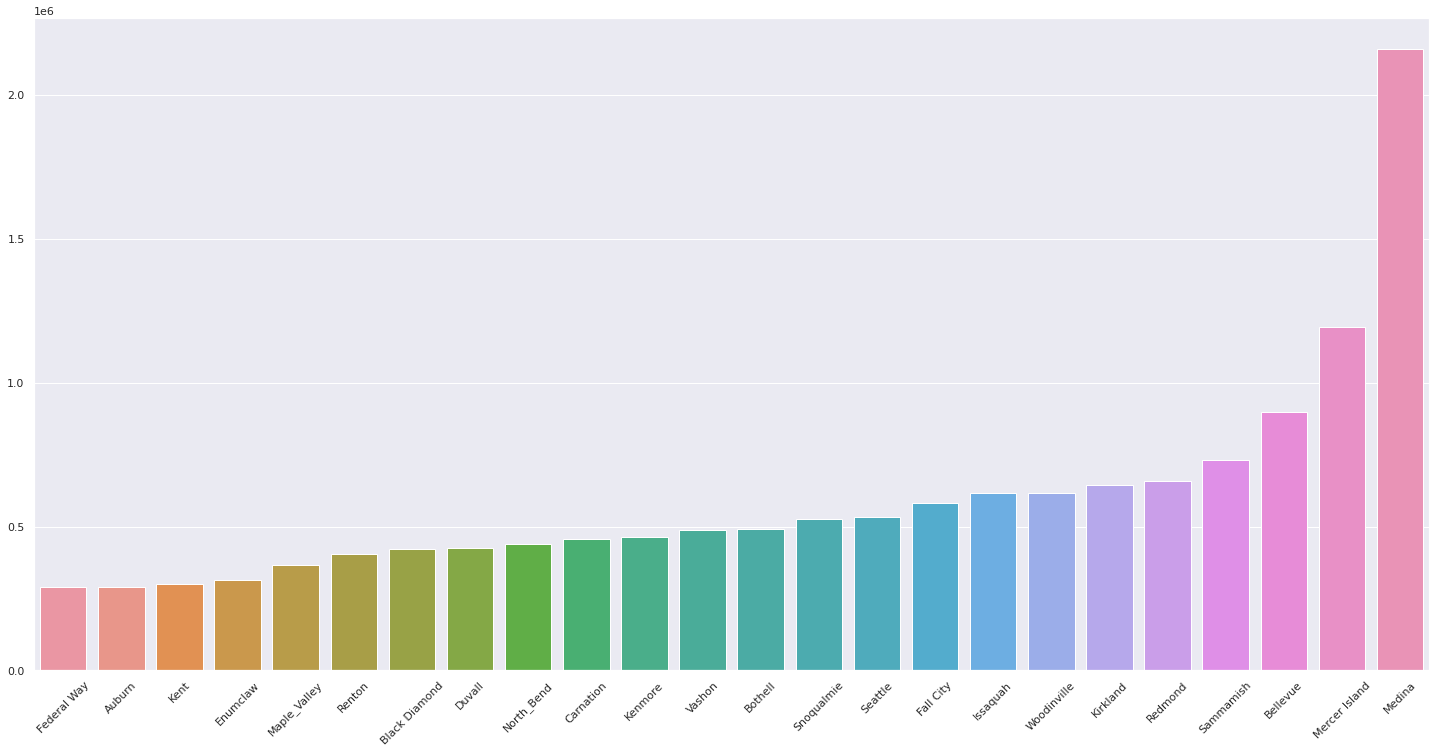

In [35]:
# plotting mean houses price by city
sns.barplot(list(mean_price_cities.keys()), list(mean_price_cities.values()));
plt.xticks(rotation=45);

### H6. What are the correlations between house prices and region? 
Response: the correlation between houses price and region are of 0.25%, wich is considerate an median correlation

In [36]:
# enconding cities columns with Label Encoder 
label_encoder = LabelEncoder()
base4['cities_encoded'] = label_encoder.fit_transform(base4['cities'])

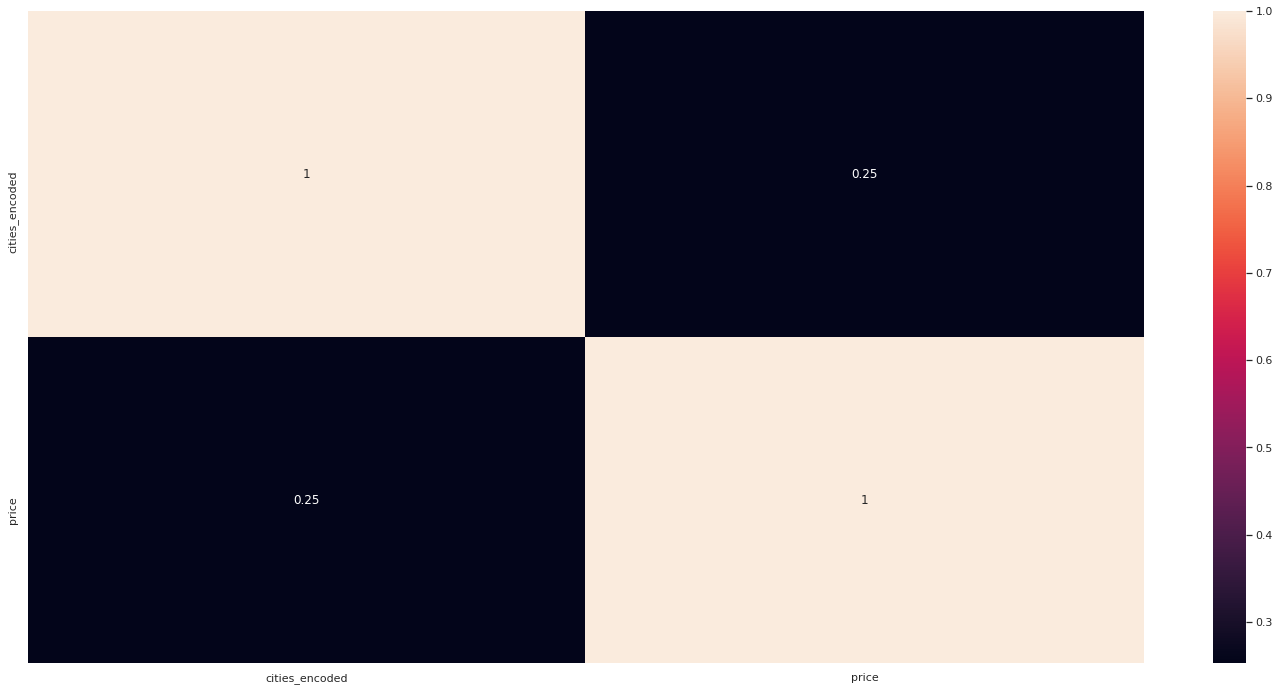

In [37]:
# plotting heatmap of cities x prices 
aux6 = base4[['cities_encoded', 'price']].groupby('cities_encoded').sum().reset_index()
x_heat = sns.heatmap(aux6.corr(method='pearson'), annot=True);

### H7. Wich is the city with more house solds? 
Response: The city with most sales is Seattle

In [38]:
# making a dictionary with all values of house sales by city 
sales_per_city = base4['cities'].value_counts()
sales_per_city = dict(sales_per_city)

/home/andre/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


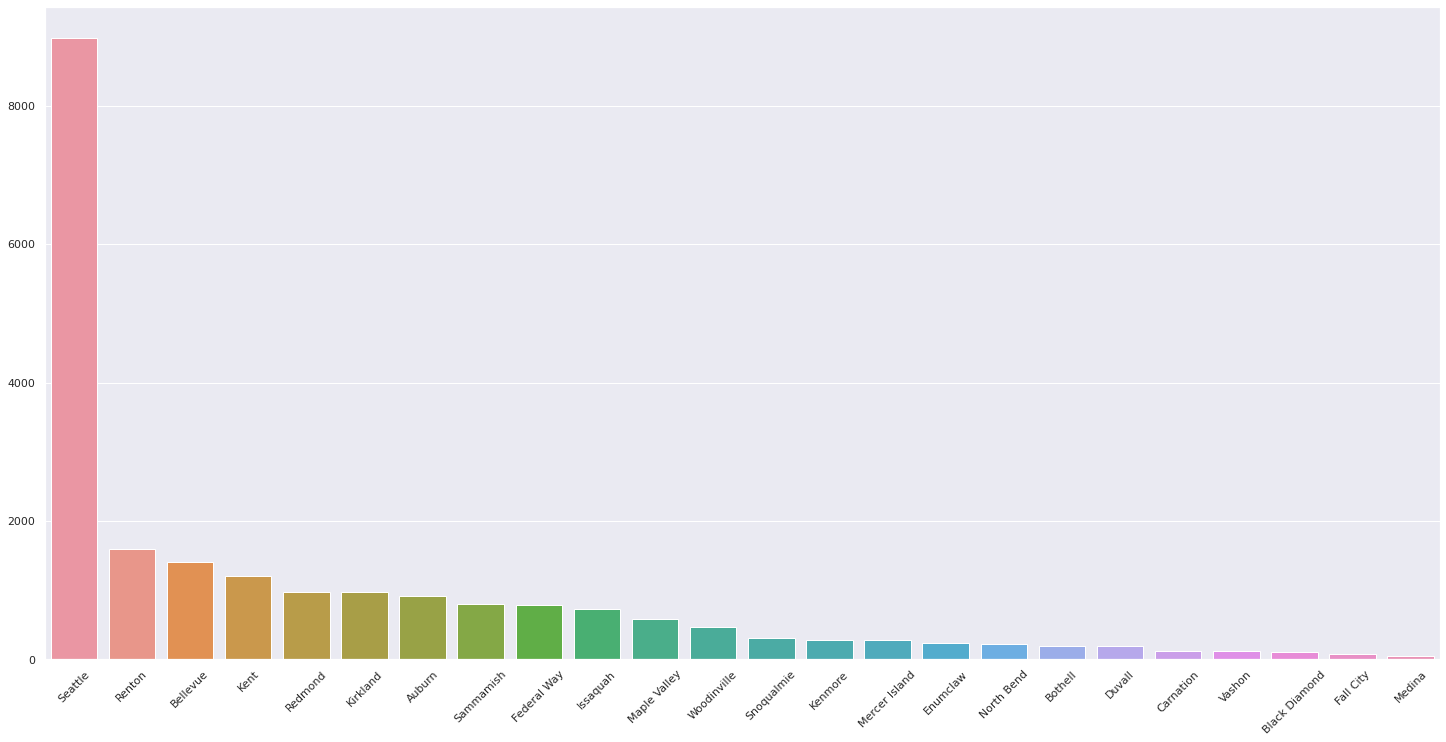

In [39]:
# plotting all values of house sales by city 
sns.barplot(list(sales_per_city.keys()), list(sales_per_city.values()));
plt.xticks(rotation=45);

# 5.0 To do in the next CRISP cicle. 
Inside of the city with most sales, wich are the best neighborhoods?

In [40]:
# get the address from lat and long data

def Location(lat, long):
    from geopy.geocoders import Nominatim

    geolocator = Nominatim(user_agent='locations')
    
    location = geolocator.reverse(str(lat) + ',' + str(long))
    
    
    return location[0][:-58]

In [ ]:
'''neighborhoods = []
for t in range(len(base_seattle)):
    neighborhoods.append(Location(base_seattle['lat'][t], base_seattle['long'][t]))''';